Acurácia: 0.8375
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



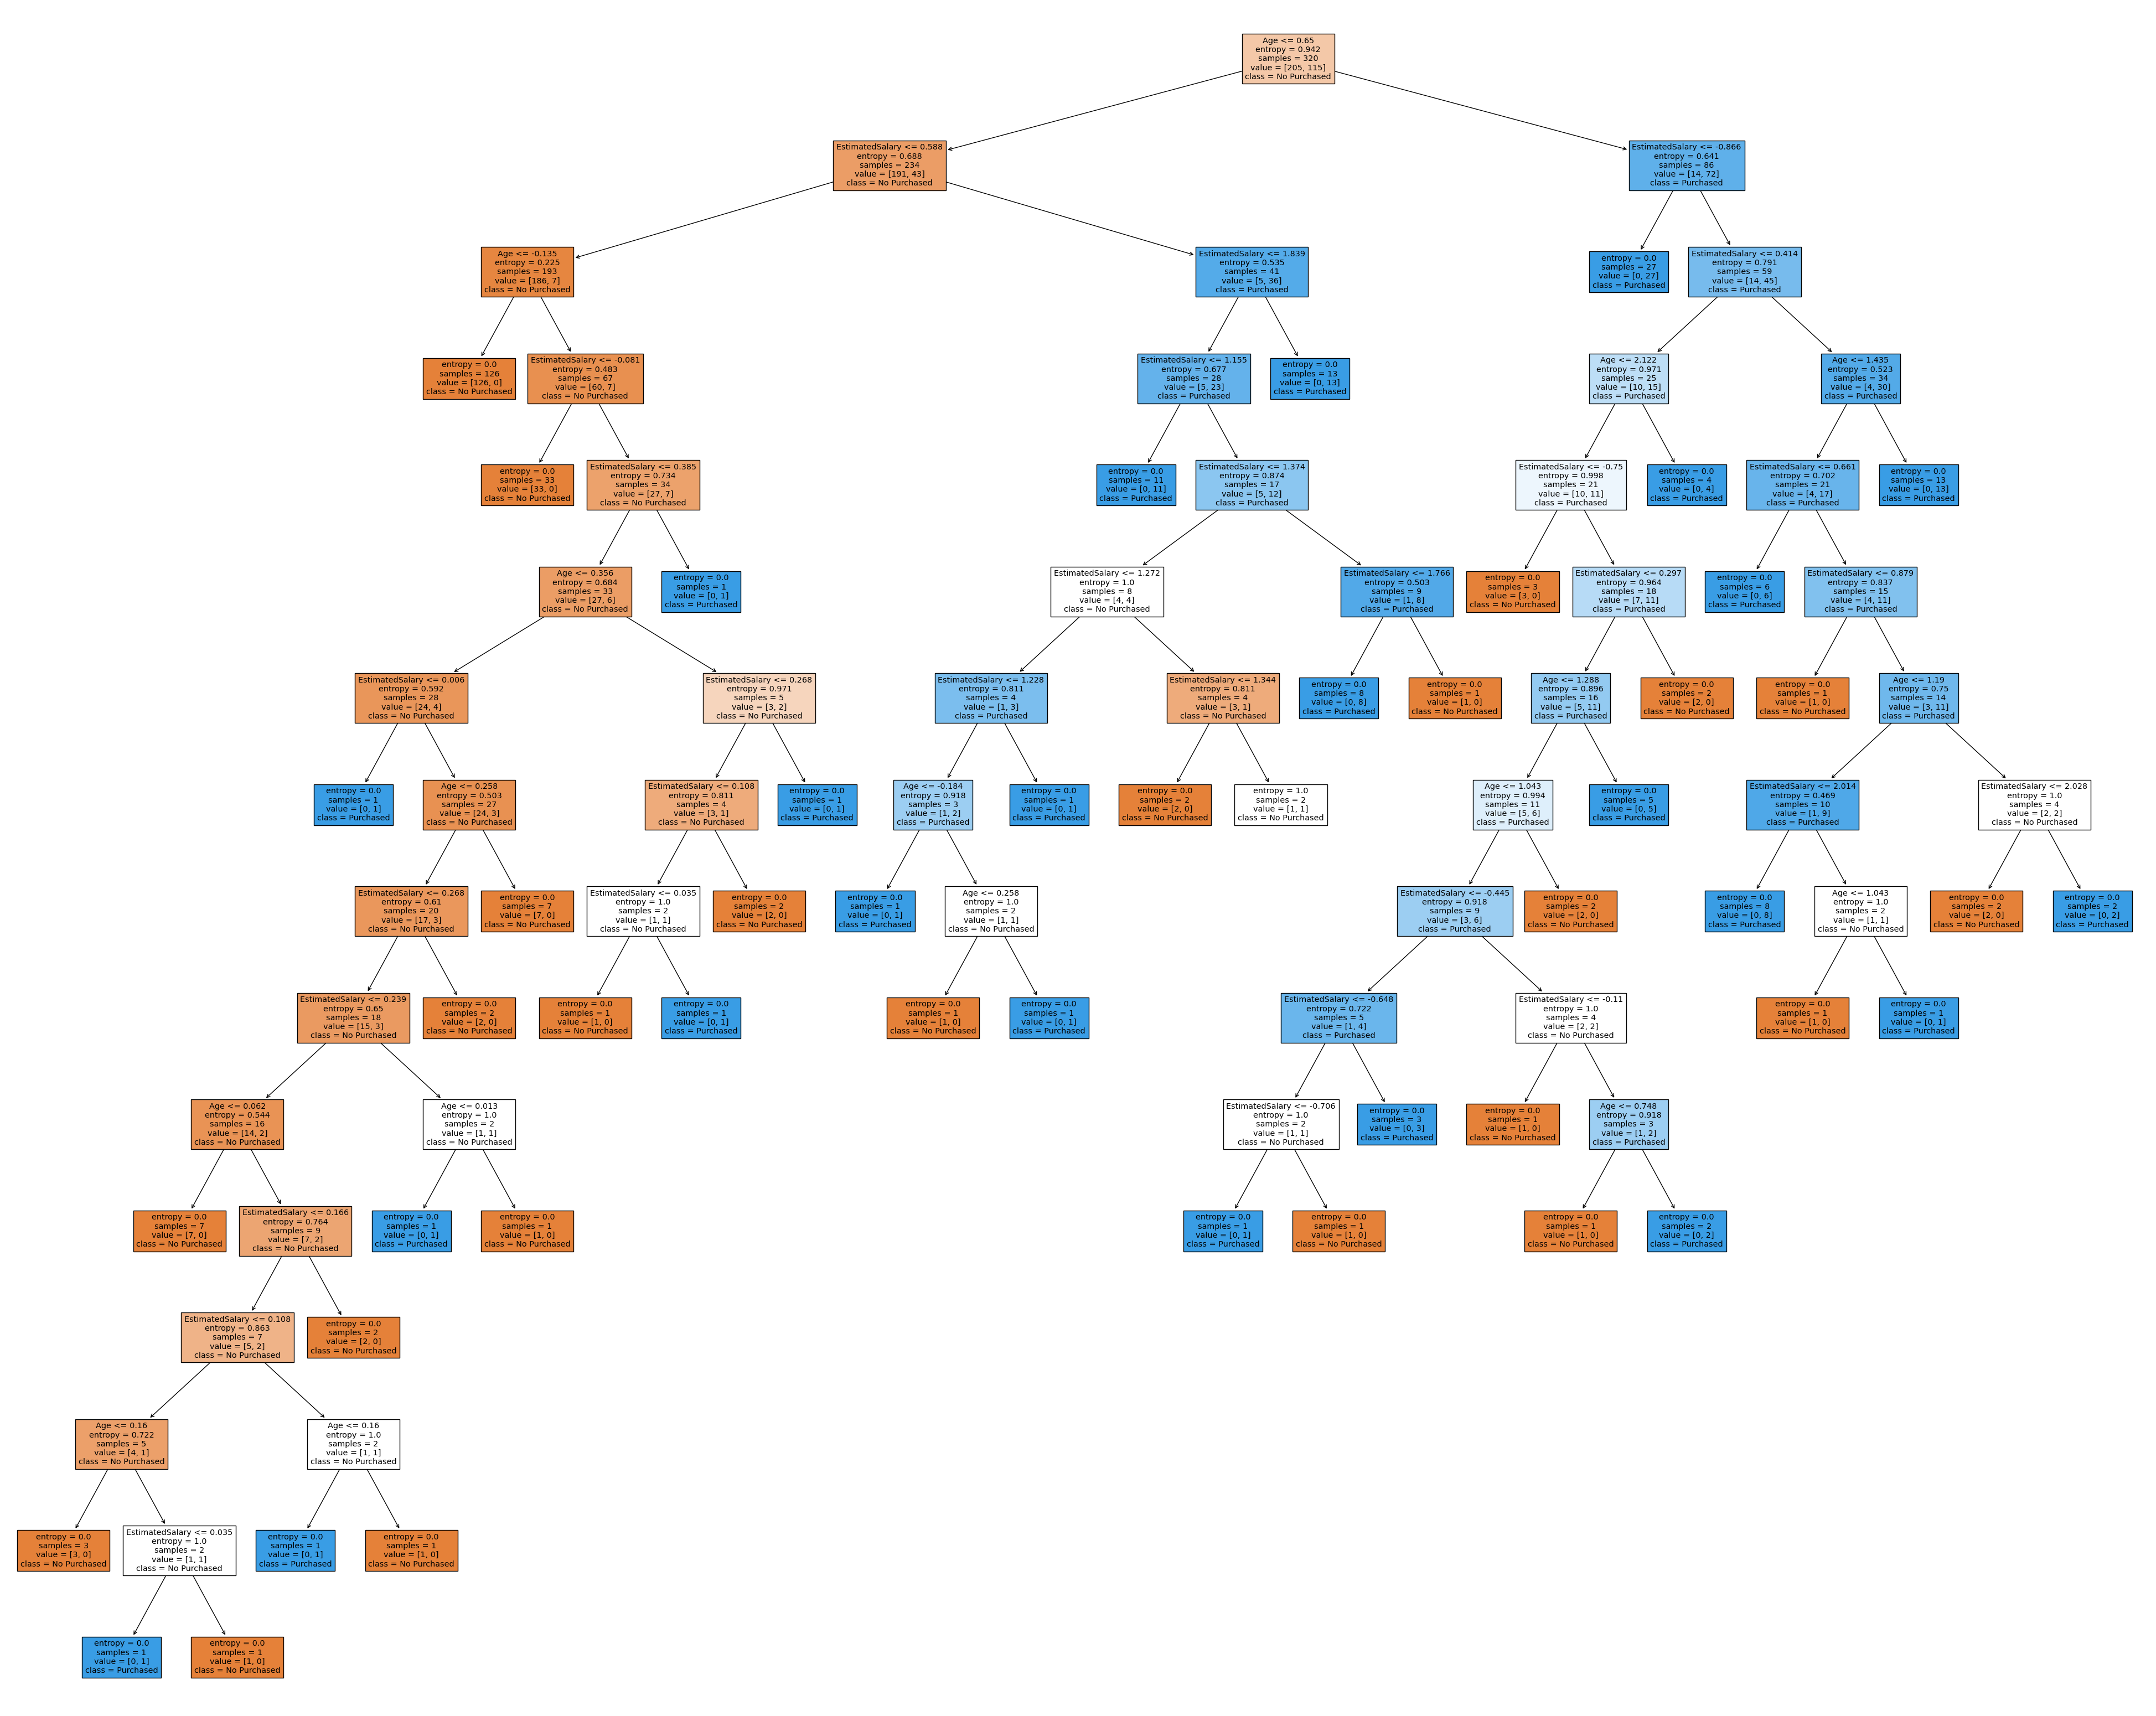

In [6]:
#! /usr/bin/env python3 #
# -*- coding: utf-8 -*- #


## Importação de módulos - - - - - - - - - - - - - - - - - - - - - - -#
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Parte principal do script - - - - - - - - - - - - - - - - - - - - -#
arquivo_csv = 'Social_Network_Ads.csv'
data_frame = pd.read_csv(arquivo_csv)

data_frame.drop(columns = ['User ID', 'Gender'], inplace=True)


## Treinamento do modelo - - - - - - - - - - - - - - - - - - - - - - -#
## variáveis preditoras
X = data_frame[['Age', 'EstimatedSalary']]
## variável alvo
Y = data_frame['Purchased']

## faz a divisão dos dados de treinamento e de teste
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)
## fazendo as devidas transformações nos dados
escalonador = StandardScaler()
X_train = escalonador.fit_transform(X_train)
X_test = escalonador.transform(X_test)

## cria o modelo e faz o treinamento
modelo = tree.DecisionTreeClassifier(criterion='entropy',
                                     random_state = 0)
modelo.fit(X_train, Y_train)

## Fazendo algumas previsões - - - - - - - - - - - - - - - - - - - - -#
Y_previsto = modelo.predict(X_test)

## Avaliação do modelo - - - - - - - - - - - - - - - - - - - - - - - -#
print(f'Acurácia: {accuracy_score(Y_test, Y_previsto)}')
print(f'Relatório de classificação:\n'
      f'{classification_report(Y_test, Y_previsto)}')


## Visualizando a árvore de decisão - - - - - - - - - - - - - - - - - #
representacao_arvore = tree.export_text(modelo)

# figsize=(25,20)
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(modelo,
                   feature_names=X.columns.tolist(),
                   class_names=['No Purchased', 'Purchased'],
                   filled=True)
plt.show()


### Overfit

Quanto maior o número de colunas de input você pasar para o modelo maior será a quantiade de nós e existirá uma possiblidade de acontecer o overfitting


Overfitting ocorre quando o modelo aprende tão bem as particularidades e detalhes do conjunto de treino que ele se ajusta demais a esses dados específicos. Ele se torna como um "aluno" que decora todas as respostas do teste, mas quando recebe um novo teste (novos dados), ele se confunde, pois as respostas não seguem exatamente o mesmo padrão.

### Entropia

quanto menor a entropia, maior é a certeza da precisão do modelo e do acerto de suas decisões

Entropia alta: Se os dados estão igualmente divididos entre as classes, a entropia é alta (máxima quando há uma divisão 50/50). Isso significa que há muita incerteza, porque os dados estão bem misturados.

Exemplo: Se você tem 50% de "sim" e 50% de "não", a entropia será 1 (máxima).

Entropia baixa: Quando todos os dados pertencem a uma única classe, a entropia é baixa (0). Isso significa que o conjunto é puro, sem incerteza.

Exemplo: Se você tem 100% de "sim" e 0% de "não", a entropia será 0.


## Random Forest

- Vantagens
    - Robusto a overfitting
    - Ideal para dataset grande
    - Paralelizável 
    - Importância das variáveis preditoras
    - Não linear

- Desvantagens
    - Complexidade e custo
    - interpretação do modelo
    - tempo de predição

- Aplicações
    - Conceder empréstimo
    - Predizer aceitação de um produto novo
    - Predição de doenças
    - Sistemas de recomendação


### Gini

- Ganho de informação

o quanto cada variável pesa na classificação 

o que a calssificação é, e o quanto cada variável influencia na decisão


<Figure size 640x480 with 0 Axes>